In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muon
from iminuit import Minuit
from iminuit import cost
from iminuit.cost import LeastSquares
from scipy import stats

r = np.random

In [2]:
def linexp(x,N,tau,c):
    return N*np.exp(-x/tau) + c
def gaussexpo(x,N,mu,sigma,tau,d):
    return N*np.exp(-0.5*((x-mu)/sigma)**2)*np.exp(-x/tau) + d

In [3]:
data3 = np.genfromtxt('Data/123_2102_Rep.txt',skip_header=2,delimiter=':',invalid_raise=False,usecols=[1,2,3])
hours3, minutes3, seconds3 = data3[:,0],data3[:,1],data3[:,2]
hours3 -= hours3[0]
time3 = hours3*3600 + minutes3*60 + seconds3
tottime3 = time3[-1]
total3 = len(data3[:,0])
print("The rate of muons for detectors 1,2,3 is",total3/tottime3)
data5 = np.genfromtxt('Data/125_1702_Rep.txt',skip_header=2,delimiter=':',invalid_raise=False,usecols=[1,2,3])
hours5, minutes5, seconds5 = data5[:,0],data5[:,1],data5[:,2]
hours5 -= hours5[0]
time5 = hours5*3600 + minutes5*60 + seconds5
tottime5 = time5[-1]
total5 = len(data5[:,0])
print("The rate of muons for detectors 1,2,5 is",total5/tottime5)

The rate of muons for detectors 1,2,3 is 3.9387899795178827
The rate of muons for detectors 1,2,5 is 0.14753681587929096


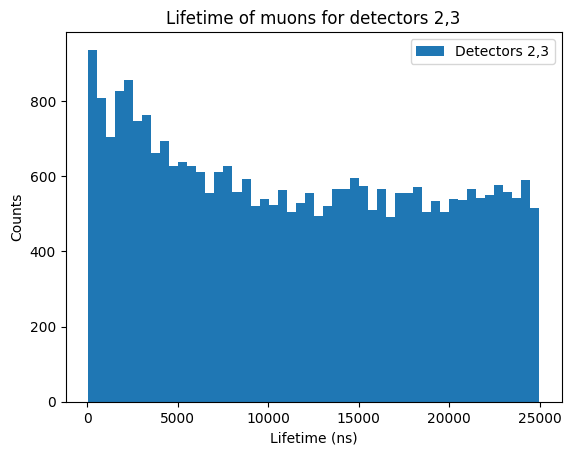

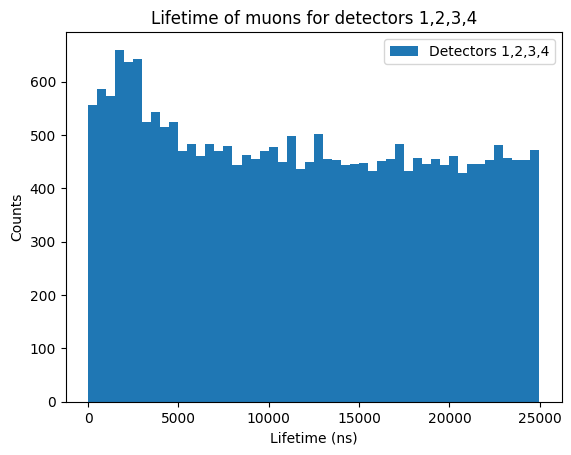

In [4]:
lifetimedata1 = np.genfromtxt('Data/lifetime2303.txt',skip_header=4,delimiter=';',invalid_raise=False,usecols=[2])
lifetimedata2 = np.genfromtxt('Data/1234_1403-lifetime.txt',skip_header=4,delimiter=';',invalid_raise=False,usecols=[2])
plt.hist(lifetimedata1,bins = 50,label='Detectors 2,3')
error1 = np.sqrt(lifetimedata1)
error2 = np.sqrt(lifetimedata2)
plt.xlabel('Lifetime (ns)')
plt.ylabel('Counts')
plt.title('Lifetime of muons for detectors 2,3')
plt.legend()
plt.show()
plt.hist(lifetimedata2,bins = 50,label='Detectors 1,2,3,4')
plt.xlabel('Lifetime (ns)')
plt.ylabel('Counts')
plt.title('Lifetime of muons for detectors 1,2,3,4')
plt.legend()
plt.show()


In [5]:
binamount = 50
counts1, bins1 = np.histogram(lifetimedata1,bins=binamount)
bincenters1 = (bins1[:-1] + bins1[1:])/2
counts2, bins2 = np.histogram(lifetimedata2,bins=binamount)
bincenters2 = (bins2[:-1] + bins2[1:])/2
chi2_1 = LeastSquares(bincenters1,counts1,np.sqrt(counts1),linexp)
chi2_2 = LeastSquares(bincenters2,counts2,np.sqrt(counts2),linexp)
m1 = Minuit(chi2_1,N=counts1[0],tau=50,c=800)
m1.migrad()
m2 = Minuit(chi2_2,N=np.max(counts2),tau=2000,c=600)
m2.migrad()
plt.hist(lifetimedata1,bins = binamount,label='Detectors 2,3')
plt.plot(bincenters1,linexp(bincenters1,*m1.values),label='Fit')
plt.xlabel('Lifetime (ns)')
plt.ylabel('Counts')
plt.title('Lifetime of muons for detectors 2,3')
plt.legend()
plt.close()
plt.hist(lifetimedata2,bins = binamount,label='Detectors 1,2,3,4')
plt.plot(bincenters2,linexp(bincenters2,*m2.values),label='Fit')
plt.xlabel('Lifetime (ns)')
plt.ylabel('Counts')
plt.title('Lifetime of muons for detectors 1,2,3,4')
plt.legend()
plt.close()


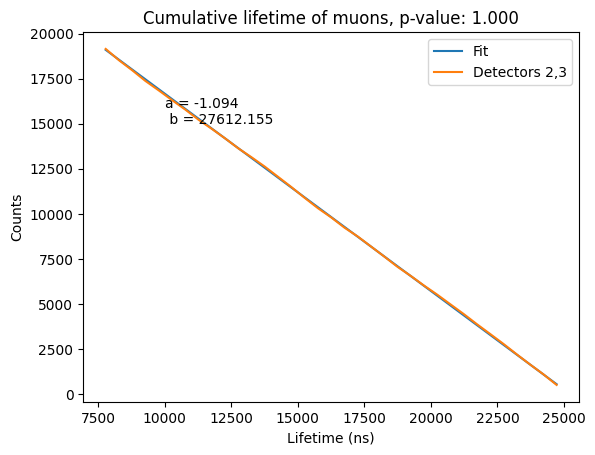

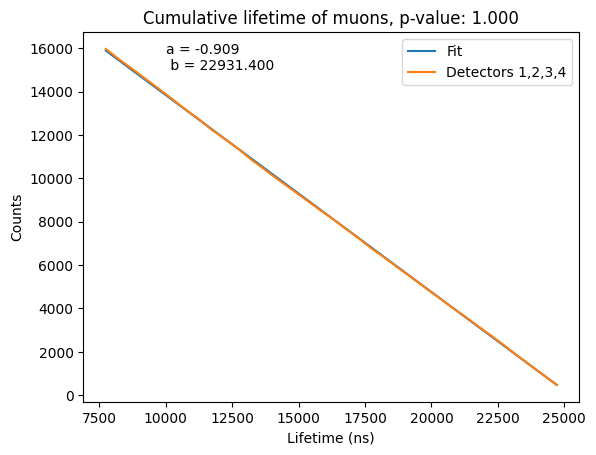

In [6]:
def linfunc(x,a,b):
    return a*x + b
counts1, bins1 = np.histogram(lifetimedata1,bins=binamount)
bincenters1 = (bins1[:-1] + bins1[1:])/2
counts2, bins2 = np.histogram(lifetimedata2,bins=binamount)
bincenters2 = (bins2[:-1] + bins2[1:])/2
mask1 = (bincenters1 > 7500) #& (bincenters1 < 22000)
mask2 = (bincenters2 > 7500) #& (bincenters2 < 22000)
cumulative1 = []
cumulative2 = []
for i in range(len(counts1)):
    cumulative1.append(np.sum(counts1[i:]))
for i in range(len(counts2)):
    cumulative2.append(np.sum(counts2[i:]))
cumulative1 = np.array(cumulative1)
cumulative2 = np.array(cumulative2)
cumulative1 = cumulative1[mask1]
bincenters1 = bincenters1[mask1]
cumulative2 = cumulative2[mask2]
bincenters2 = bincenters2[mask2]

linchi2_1 = LeastSquares(bincenters1,cumulative1,np.sqrt(cumulative1),linfunc)
linchi2_2 = LeastSquares(bincenters2,cumulative2,np.sqrt(cumulative2),linfunc)
m3 = Minuit(linchi2_1,a=-1,b=cumulative1[0])
m3.migrad()
m4 = Minuit(linchi2_2,a=-1,b=cumulative2[0])
m4.migrad()
pval1 = 1 - stats.chi2.cdf(m3.fval, len(bincenters1)-2)
pval2 = 1 - stats.chi2.cdf(m4.fval, len(bincenters2)-2)
plt.plot(bincenters1,linfunc(bincenters1,*m3.values),label='Fit')
plt.plot(bincenters1,cumulative1,label='Detectors 2,3')
plt.xlabel('Lifetime (ns)')
plt.ylabel('Counts')
plt.title(f'Cumulative lifetime of muons, p-value: {pval1:.3f}')
plt.text(10000, 15000, f'a = {m3.values[0]:.3f} \n b = {m3.values[1]:.3f}')
plt.legend()
plt.show()
plt.plot(bincenters2,linfunc(bincenters2,*m4.values),label='Fit')
plt.plot(bincenters2,cumulative2,label='Detectors 1,2,3,4')
plt.xlabel('Lifetime (ns)')
plt.ylabel('Counts')
plt.title(f'Cumulative lifetime of muons, p-value: {pval2:.3f}')
plt.text(10000, 15000, f'a = {m4.values[0]:.3f} \n b = {m4.values[1]:.3f}')
plt.legend()
plt.show()


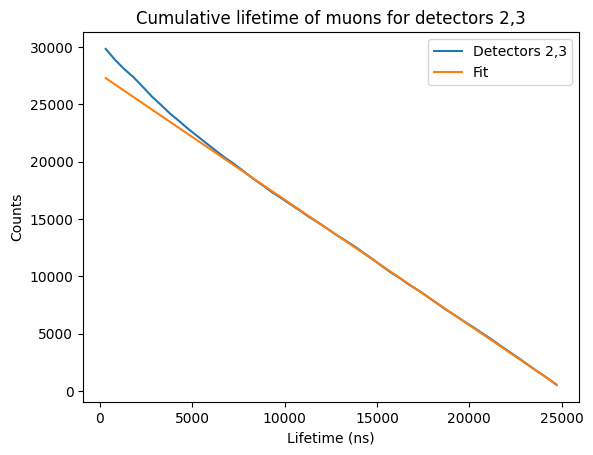

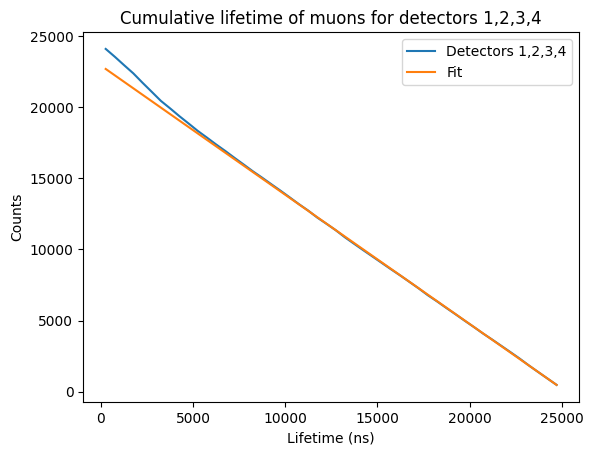

In [7]:
counts1, bins1 = np.histogram(lifetimedata1,bins=binamount)
bincenters1 = (bins1[:-1] + bins1[1:])/2
counts2, bins2 = np.histogram(lifetimedata2,bins=binamount)
bincenters2 = (bins2[:-1] + bins2[1:])/2
cumulative1 = []
cumulative2 = []
for i in range(len(counts1)):
    cumulative1.append(np.sum(counts1[i:]))
for i in range(len(counts2)):
    cumulative2.append(np.sum(counts2[i:]))
cumulative1 = np.array(cumulative1)
cumulative2 = np.array(cumulative2)
cumulativeoriginal1 = np.copy(cumulative1)
cumulativeoriginal2 = np.copy(cumulative2)
bincenters1original = np.copy(bincenters1)
bincenters2original = np.copy(bincenters2)
cumulative1 = cumulative1[mask1]
bincenters1 = bincenters1[mask1]
cumulative2 = cumulative2[mask2]
bincenters2 = bincenters2[mask2]
linback1 = linfunc(bincenters1original,*m3.values)
linback2 = linfunc(bincenters2original,*m4.values)
plt.plot(bincenters1original,cumulativeoriginal1,label='Detectors 2,3')
plt.plot(bincenters1original,linback1,label='Fit')
plt.xlabel('Lifetime (ns)')
plt.ylabel('Counts')
plt.title('Cumulative lifetime of muons for detectors 2,3')
plt.legend()
plt.show()
plt.plot(bincenters2original,cumulativeoriginal2,label='Detectors 1,2,3,4')
plt.plot(bincenters2original,linback2,label='Fit')
plt.xlabel('Lifetime (ns)')
plt.ylabel('Counts')
plt.title('Cumulative lifetime of muons for detectors 1,2,3,4')
plt.legend()
print()

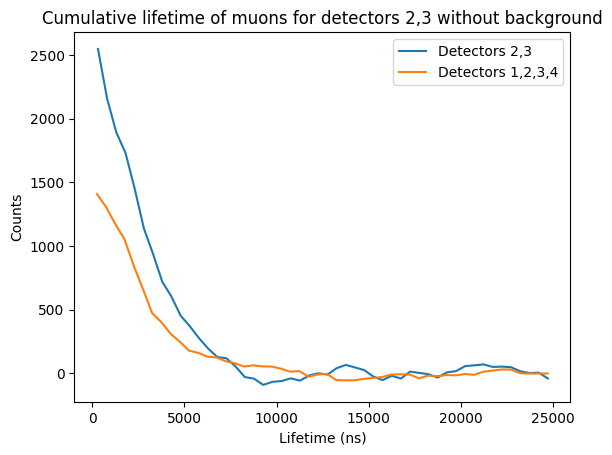

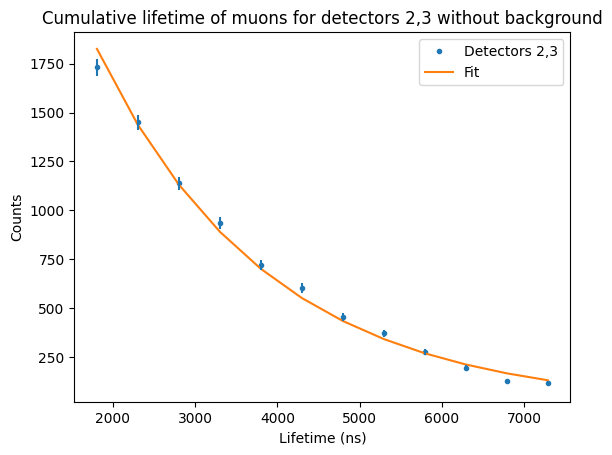

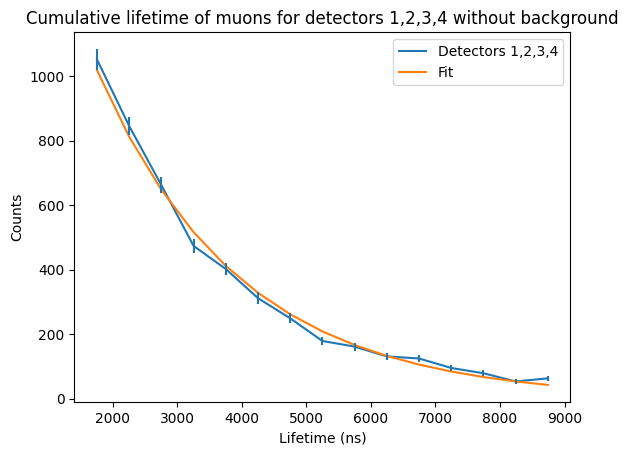

2081.6248411413203 +- 31.915634531985656 pval = 0.0007574143944315548
2203.6502099506556 +- 44.24727505689855 pval = 0.01822788487342586


In [8]:

def expofunc(x,N,tau):
    return N*np.exp(-x/tau)
withoutback1 = cumulativeoriginal1 - linback1
withoutback2 = cumulativeoriginal2 - linback2
bincenters1 = bincenters1original
bincenters2 = bincenters2original
plt.plot(bincenters1,withoutback1,label='Detectors 2,3')
plt.xlabel('Lifetime (ns)')
plt.ylabel('Counts')
plt.title('Cumulative lifetime of muons for detectors 2,3 without background')
plt.plot(bincenters2,withoutback2,label='Detectors 1,2,3,4')
plt.legend()
plt.show()
fittingrange1 = (bincenters1 > 1500) & (bincenters1 < 7500) & (withoutback1 > 0)
fittingrange2 = (bincenters2 > 1500) & (bincenters2 < 9000) & (withoutback2 > 0)

bincenters1 = bincenters1[fittingrange1]
withoutback1 = withoutback1[fittingrange1]
bincenters2 = bincenters2[fittingrange2]
withoutback2 = withoutback2[fittingrange2]
chi2_1 = LeastSquares(bincenters1,withoutback1,np.sqrt(withoutback1),expofunc)
chi2_2 = LeastSquares(bincenters2,withoutback2,np.sqrt(withoutback2),expofunc)
m1 = Minuit(chi2_1,N=withoutback1[0],tau=2200)
m1.migrad()
m2 = Minuit(chi2_2,N=np.max(withoutback2),tau=2197)
m2.migrad()
plt.plot(bincenters1,withoutback1,'.',label='Detectors 2,3')
plt.plot(bincenters1,expofunc(bincenters1,*m1.values),label='Fit')
plt.errorbar(bincenters1,withoutback1,np.sqrt(withoutback1),fmt='none')
plt.xlabel('Lifetime (ns)')
plt.ylabel('Counts')
plt.title('Cumulative lifetime of muons for detectors 2,3 without background')
plt.legend()
plt.show()
plt.plot(bincenters2,withoutback2,label='Detectors 1,2,3,4')
plt.plot(bincenters2,expofunc(bincenters2,*m2.values),label='Fit')
plt.errorbar(bincenters2,withoutback2,np.sqrt(withoutback2),fmt='none')
plt.xlabel('Lifetime (ns)')
plt.ylabel('Counts')
plt.title('Cumulative lifetime of muons for detectors 1,2,3,4 without background')
plt.legend()
plt.show()
print(m1.values['tau'], '+-',m1.errors['tau'],"pval =",1 - stats.chi2.cdf(m1.fval, len(bincenters1)-2))
print(m2.values['tau'], '+-',m2.errors['tau'], "pval =",1 - stats.chi2.cdf(m2.fval, len(bincenters2)-2))

(array([0.02839474, 0.05615789, 0.08418421, 0.11152632, 0.13563158,
        0.16957895, 0.13810526, 0.11007895, 0.08313158, 0.08321053]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <BarContainer object of 10 artists>)

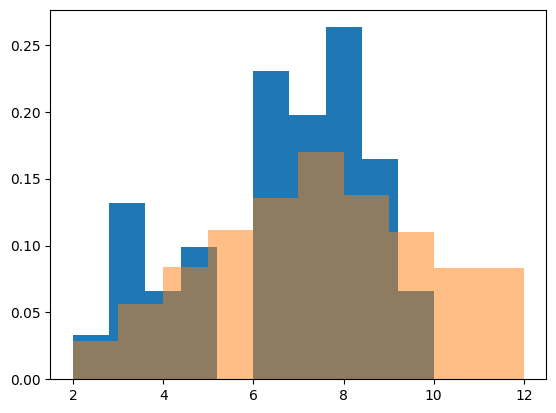

In [55]:
a = np.array([4,9,9,3,10,8,5,8,7,9,3,8,7,9,6,8,7,5,7,7,6,8,8,6,8,6,4,8,3,9,7,6,2,6,10,5,6,3])
plt.hist(a,bins=10, density = True)
b = np.random.choice([1,2,3,4,5,6],size = len(a)*1000) + np.random.choice([1,2,3,4,5,6],size = len(a)*1000)
plt.hist(b,bins=10, alpha = 0.5, density = True)